# ⚡ Grupo 6 - UTEC 4Geeks BID 2022 ⚡
# PROYECTO FINAL

# Stroke Prediction 

## 1. Introduction

Stroke happens when the blood supply to part of the brain is cut off. Without blood, brain cells can be damaged or die. Fast access to treatment saves lives and improves recovery.

There are many factors, including tobacco use, physical inactivity, unhealthy diet, harmful use of alcohol, atrial fibrillation, raised blood lipid levels, obesity, genetic disposition, stress and depression.

Stroke has already reached epidemic proportions. 1 in 4 of us will have a stroke in our lifetime. 

Ref: https://www.world-stroke.org/

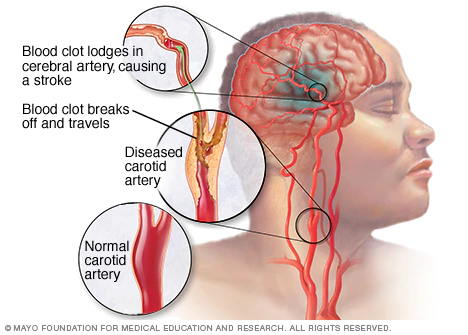

Stroke, a cerebrovascular disease, is one of the major causes of death. It causes significant health and financial burdens for both patients and health care systems. One of the important risk factors for stroke is health-related behavior, which is becoming an increasingly important focus of prevention. Many machine learning models have been built to predict the risk of stroke or to automatically diagnose stroke, using predictors such as lifestyle factors or radiological imaging. (Alanazi EM, Abdou A, Luo J. Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models.
 (JMIR Form Res. 2021 Dec 2;5(12):e23440. doi: 10.2196/23440. PMID: 34860663; PMCID: PMC8686476.)

**In Uruguay**, stroke has a fundamental epidemiological importance: it is among the three leading causes of death at a general level and it is the leading cause of disability in adults. According to data published by the Commission for Cardiovascular Health, around 80 million people living in the world today have suffered a stroke and, consequently, more than 50 million survivors live with some type of permanent disability. Although life after a stroke is not the same in many cases, it is possible, with the right care and support, to continue with a good quality of life. CVAs are time-dependent, which means that it is essential to identify them as quickly as possible in order to establish the most appropriate treatment for the patient and prevent possible sequelae; they constitute one of the leading causes of disease burden worldwide and in Uruguay, measured in years of healthy life lost, an indicator that encompasses both mortality and disability caused by these diseases.

According to the latest data from the Ministry of Public Health, from December 2019, during 2018, 1,732 people died from stroke and 2,125 people from cerebrovascular causes in general. (https://um.edu.uy/noticias/el-acv-es-una-enfermedad-con-alta-incidencia-en-uruguay-y-el-mundo)



**Models can predict risk with high accuracy while maintaining a reasonable false positive rate.**

Stroke is the second leading cause of death worldwide. According to the World Health Organization [1], 5 million people worldwide suffer a stroke every year. Of these, one third die and another third are left permanently disabled. In the United States, someone has a stroke every 40 seconds and every four minutes, someone dies [2]. The aftermath is devastating, with victims experiencing a wide range of disabling symptoms including sudden paralysis, speech loss or blindness due to blood flow interruption in the brain [3]. The economic burden to the healthcare system in the United States amounts to about $34 billion per year in the US [4]. An additional $40 per year is spend on care for elderly stroke survivors [5]. 

([1]  Stroke, Cerebrovascular accident | Health topics – WHO EMRO

[2] Heart Disease and Stroke Statistics2020 Update: A Report From the …

[3] The science of stroke: Mechanisms in search of treatments

[4] American Heart Association Statistics Committee and Stroke Statisti…

[5] Care received by elderly US stroke survivors may be underestimated.)

**Our model it's about screen healthy patients to know the degree of probability of suffering a stroke or not suffering it to work on a personalized prevention plan**

### Metadata
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not



**Studying the data dictionary our first conclusions is:
Contains some of the preconditions recognized worldwide as causes of the disease.**





In [ ]:
!pip install --upgrade pip
!pip install pandas numpy seaborn plotly
!pip install sklearn
!pip install statsmodels
!pip install imblearn
!pip install pygal
!pip install autoviz
!pip install missingno

# 1.1 Import Libraries and modules



In [134]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import NearMiss
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier, ExtraTreesClassifier

import missingno as msno
import scipy.stats as stats
import warnings
sns.set(style='darkgrid', context='notebook')

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [165]:
sns.set(rc={'figure.figsize': (8, 6)})
plt.style.use('fivethirtyeight')

Text(-0.75, -0.64, 'Mostly same colors will be used for throughout this notebook.')

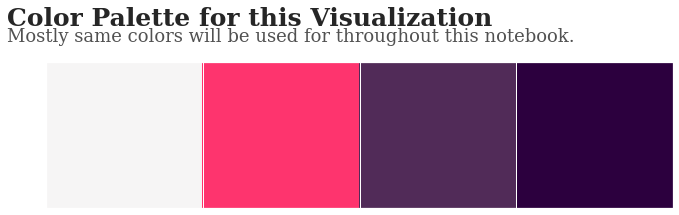

In [164]:
# color palette for visualizations
colors = ['#f6f5f5','#fe346e','#512b58','#2c003e']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)


In [5]:
# para usar en drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset  

The information was downloaded from the Kaggle site.
 https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset because we did not find Uruguayan public data about stroke.


In [136]:

df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')


In [7]:
#usamos este en el drive compartido
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/healthcare-dataset-stroke-data.csv')

In [8]:
#usamos este en el drive compartido
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/healthcare-dataset-stroke-data.csv')

## 1.2 Data Preprocessing

**Get basic info**

Non-Null ValueCounts and Feature Datatypes.


In [9]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [145]:
df_raw.isnull().sum().to_frame(name="Missing values").sort_values(by="Missing values", ascending=False).style.background_gradient(cmap='Reds')

### Initial Insights About Dataset

- This have 12 columns whith 5110 observations.
- Both Categorical and numerical features are present.

    Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status

    Binary Numerical Features: hypertension,heart_disease, stroke
    
    Continous Numerical Features: age, avg_glucose_level, bmi

- Missing value in bmi.



In [11]:
df_raw.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

 **Stroke** See amount of value of our target 



In [146]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

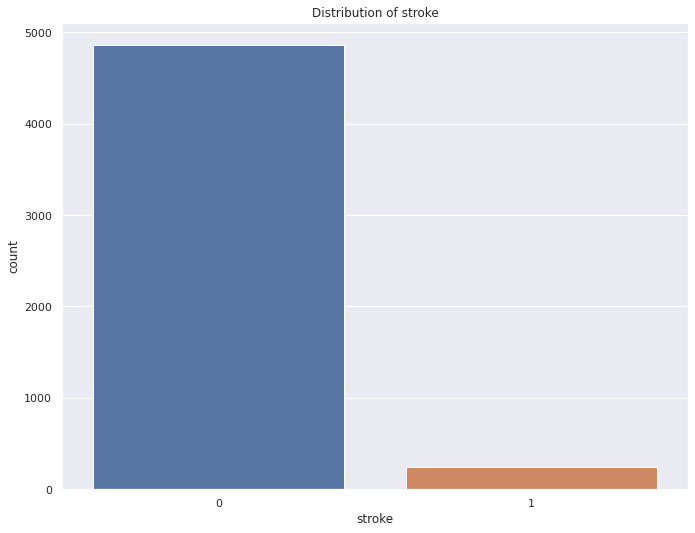

In [147]:
sns.countplot(x=df_raw['stroke'])
plt.title('Distribution of stroke')
plt.show()

AttributeError: 'Text' object has no property 'Size'

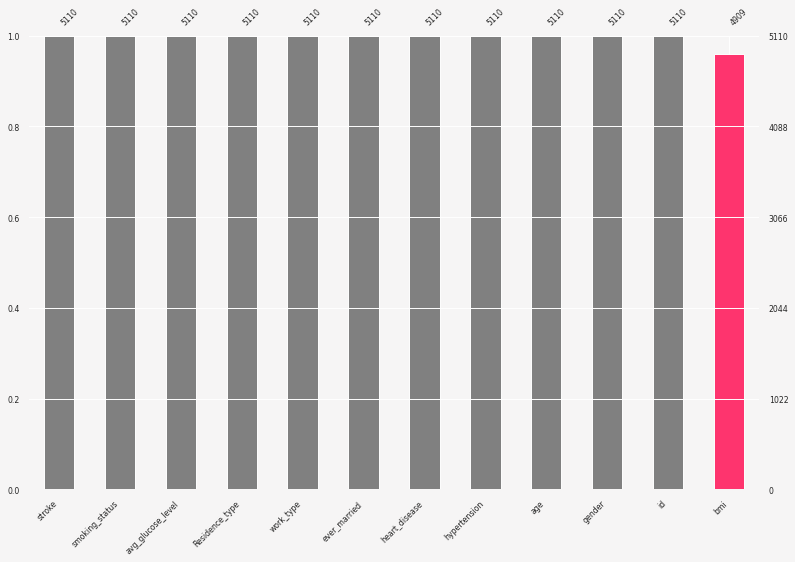

In [152]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e']
fig, ax = plt.subplots(figsize = (8, 6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


msno.bar(df_raw, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.20,'Visualization of Nullity of The Dataset',{'font': 'Serif', 'Size': 12,  'color':'black'},alpha = 0.9)
ax.text(-1,1.20,'Overall there are 5110 datapoints are present in \nthe given dataset. Only "bmi" feature have null values.',{'font': 'Serif', 'Size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif', 'Size': 10,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

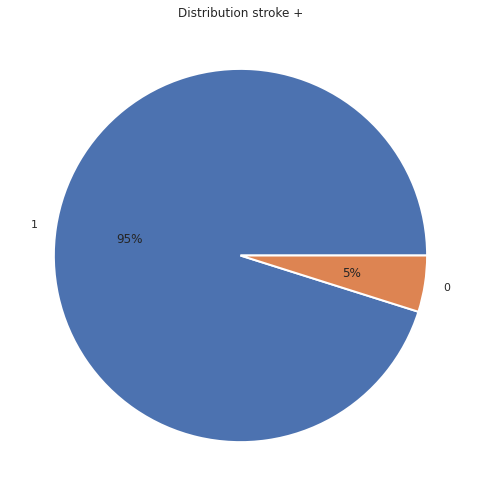

In [153]:
plt.figure(figsize=(8, 6))
plt.pie(df_raw["stroke"].value_counts().values, labels=df_raw["stroke"].unique(), autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Distribution stroke +")
plt.show()

**Note: We  have a highly unbalanced data distribution**

From distribution it is clear that every 5 patient out of 100 patient are having strokes.

An obvious case is in the Health area where we usually find data sets with thousands of records with “negative” patients and a few positive cases, that is, those who suffer from the disease we want to classify.

A highly unbalanced data distribution, and null accuracy score of this distribution it self is 95%, which imploys any dump model should randomly predictions of stroke could reach accuracy of 95%. So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

If we measure the effectiveness of our model by the number of hits it had, only taking into account the majority class we may be having a false feeling that the model works well.

We have four possible cases for each class:

- High precision and high recall: the model perfectly handles that class
- High precision and low recall: the model does not detect the class very well, but when it does, it is highly reliable.
- Low precision and high recall: The class detects the class well but also includes samples from other classes.
- Low precision and low recall: The model fails to classify the class correctly.

When we have a dataset with imbalance, it usually happens that we obtain a high precision value in the Majority class and a low recall in the Minority class.




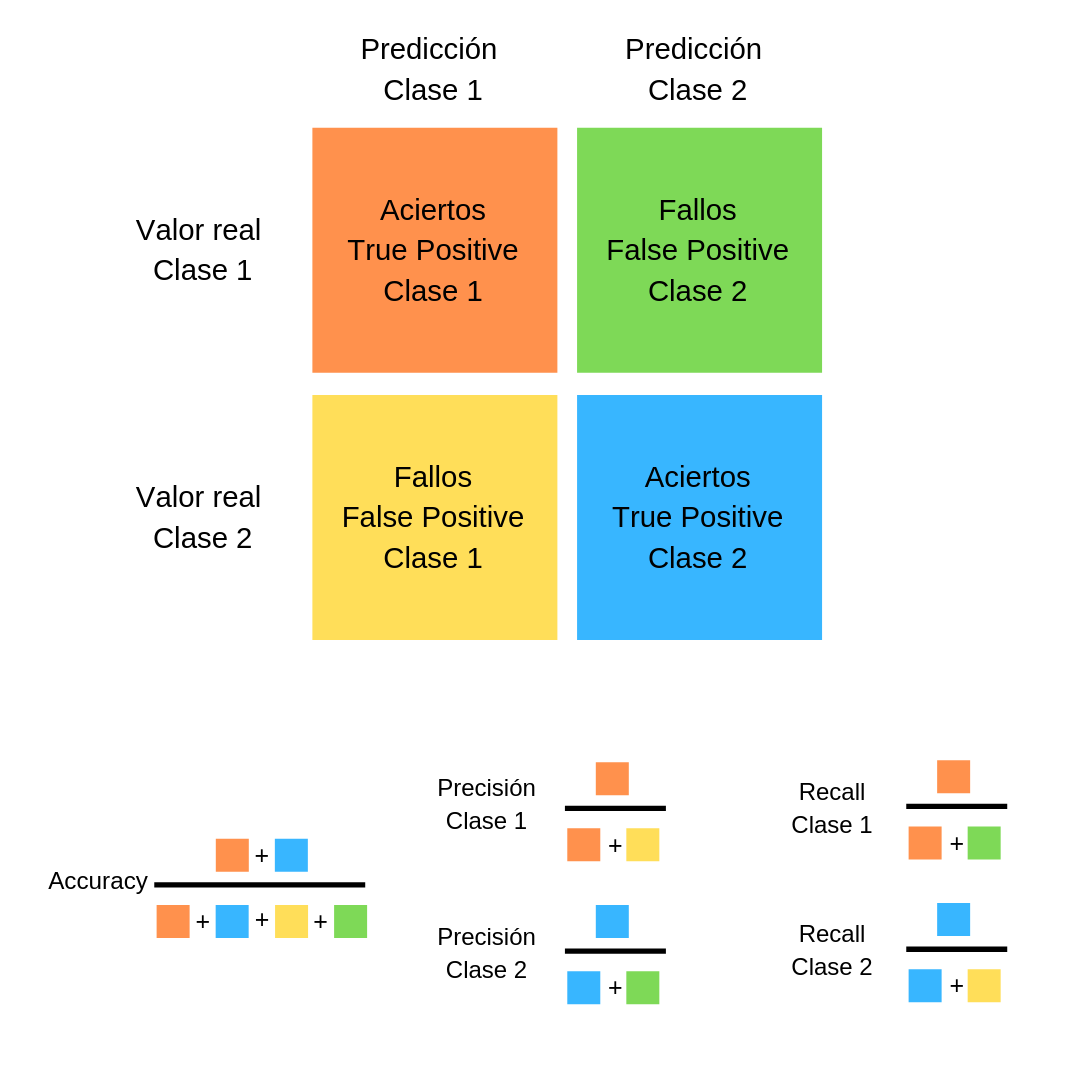

***There are several strategies for working with unbalanced datasets that we will discuss later.***

## 2.0 Distribution of Targets

**Gender**

<AxesSubplot:>

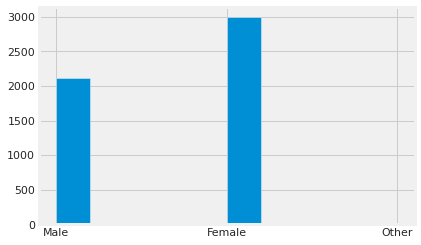

In [15]:
df_raw.gender.hist()

***Residence_Type***  

1.   Urban
2.   Rural



In [17]:
df_raw['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:>

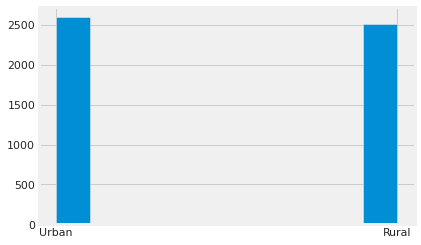

In [18]:
df_raw.Residence_type.hist()

***Ever_married***

*   Yes
*   No



In [19]:
df_raw['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:>

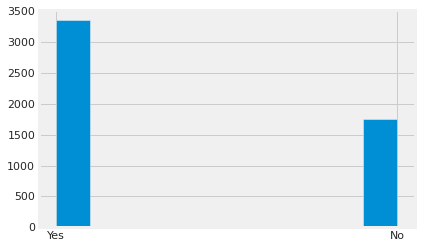

In [20]:
df_raw.ever_married.hist()

***Work_Type***

*   Private
*   Govt_job
*   Self-employed
*   children
*   Never_worked



In [21]:
df_raw['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:>

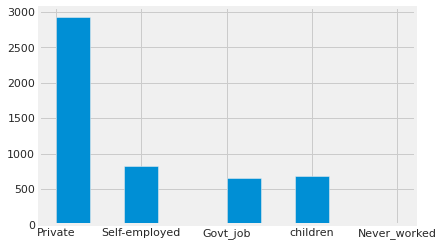

In [22]:
df_raw.work_type.hist()

***smoking_status***
 * never_smoked
 * fromerly smoked
 * smokes
 * Unknown


    "formerly smoked": An adult who has smoked in his or her lifetime but who had quit smoking at the time of interview.
    "Unknown": not have data about this patients


In [23]:
df_raw['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:>

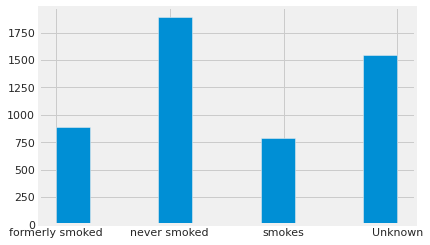

In [24]:
df_raw.smoking_status.hist()

In [157]:
## binning of numerical variables

df_raw['bmi_cat'] = pd.cut(df_raw['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df_raw['age_cat'] = pd.cut(df_raw['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df_raw['glucose_cat'] = pd.cut(df_raw['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

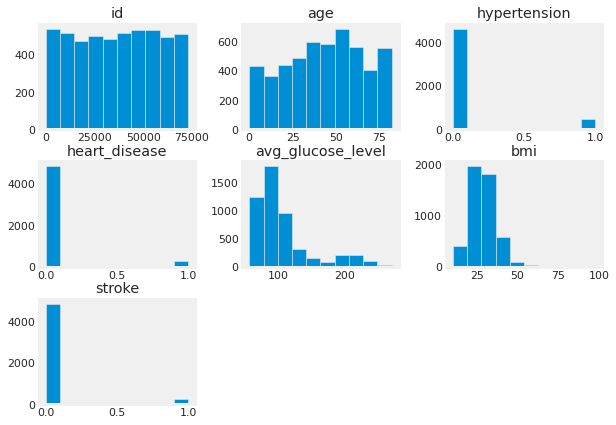

In [26]:
df_raw.hist(bins=10,figsize=(8, 6),grid=False);
plt.show()

***We look for information about some variables to study our dataset***

***hypertension***

Blood pressure is the force exerted by circulating blood against the walls of the body’s arteries, the major blood vessels in the body. Hypertension is when blood pressure is too high.




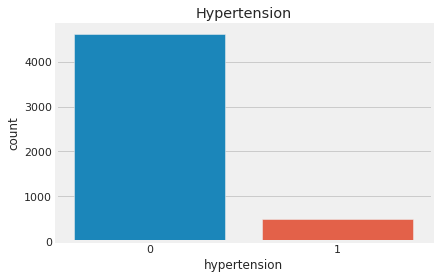

In [27]:
sns.countplot(x=df_raw['hypertension'])   #,hue=df_raw['stroke']
plt.title('Hypertension')
plt.show()

***avg_glocose_level***
Glycemia is the concentration of glucose or sugar in the blood, coming from food, especially carbohydrates. "average glucose" is a way of translating A1C test results into terms that closely represent daily glucose readings. It was introduced by the American Diabetes Association (ADA) in 2010 to help people with diabetes better understand how their A1C results compare to their daily glucose readings.

The eAG is determined using a straightforward mathematical formula that converts percentage of glycated hemoglobin as determined by an A1C test into the unit you're used to seeing on your glucometer: mg/dL: 28.7 X A1C – 46.7 = eAG.

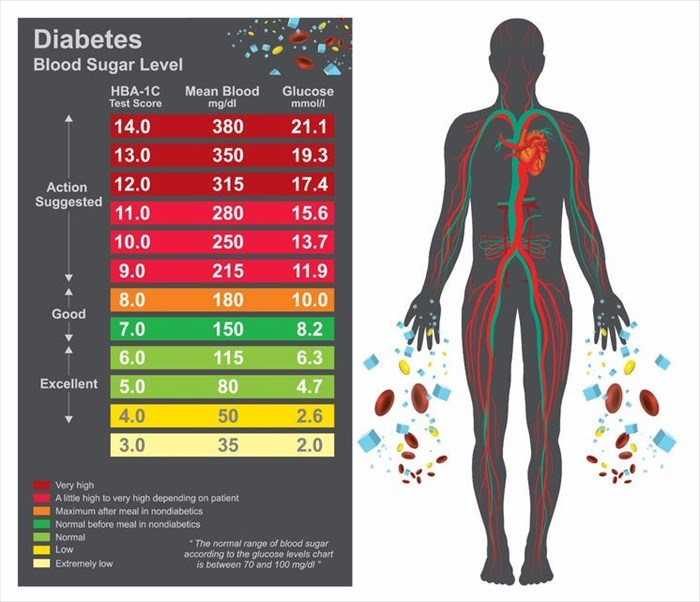

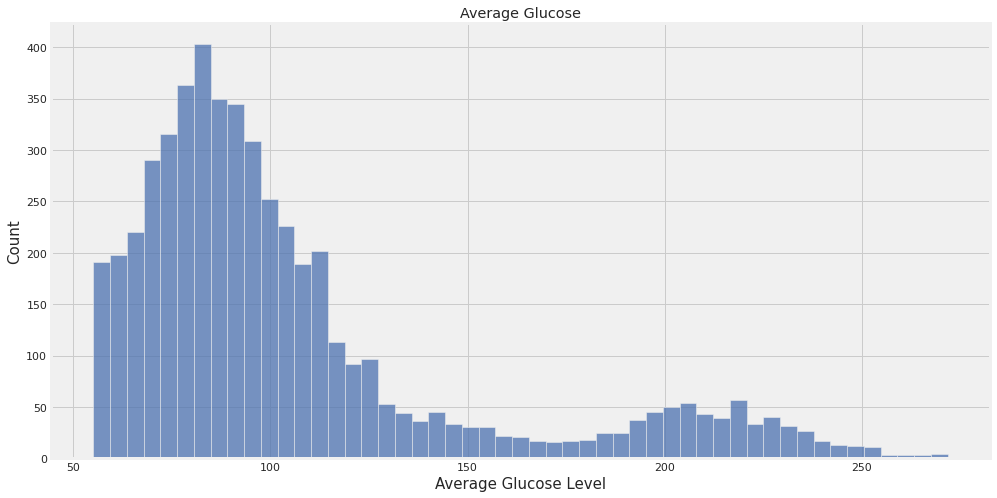

In [29]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_raw, x="avg_glucose_level")  #, hue="stroke"
plt.xlabel("Average Glucose Level", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('Average Glucose')
plt.show()

***BMI:***

Body mass index (BMI) is a person's ***weight in kilograms*** divided by the ***square of height in meters***. BMI is an easy and inexpensive screening method for weight category: underweight, healthy weight, overweight, and obesity.
The bmi is a parameter that is widely used to assess the nutritional status of a person, since it correlates 80% with body fat and, together with other anthropometric measurements, can bring us closer to the diagnosis of overweight or obesity.

It is known that in adults the normal or healthy BMI is between 18 and 25, however, these normal values ​​can vary over the years. Therefore, below we present a table where the normality of the BMI according to age is presented.

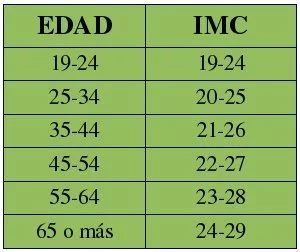


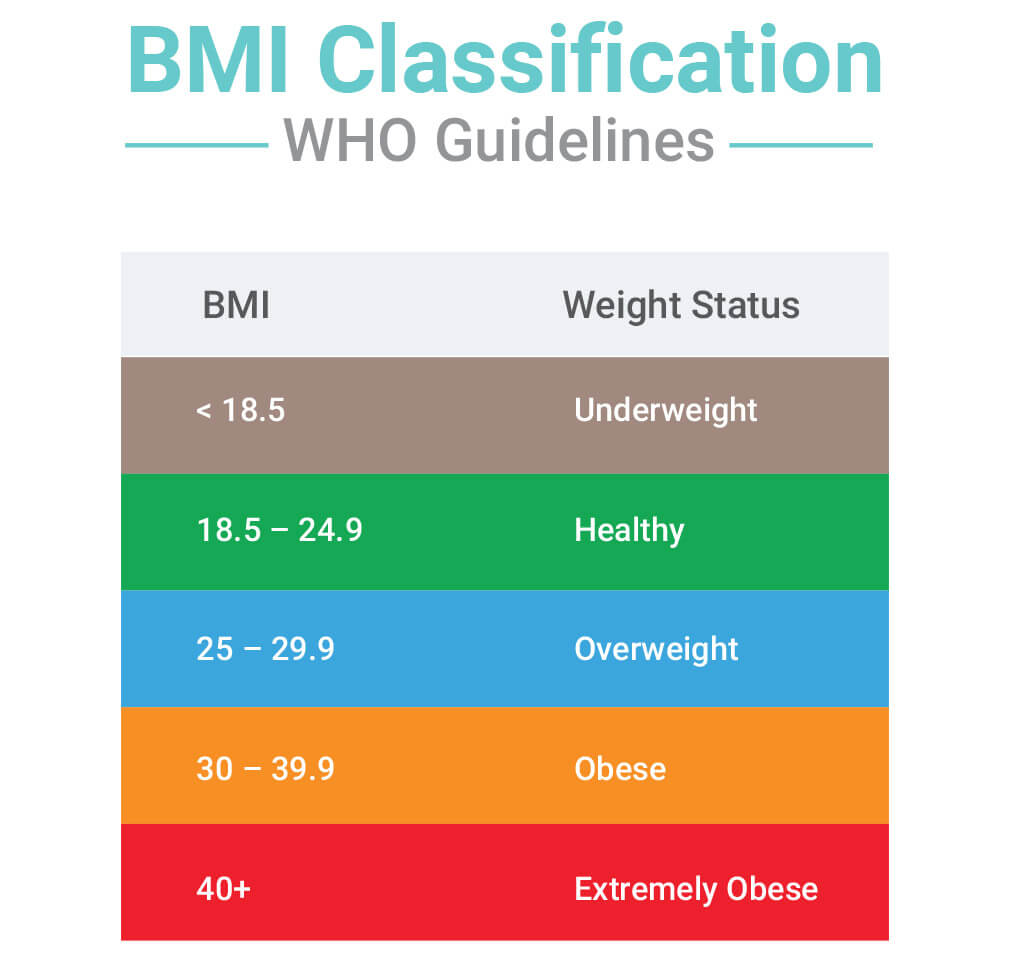

<AxesSubplot:>

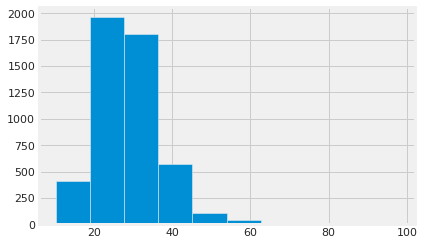

In [30]:
df_raw.bmi.hist()

In [31]:
df_raw.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

We must study the age distribution. We have read that most studies are carried out on populations > 35 years.

Most patients do not have deviations in Hypertensión and heart_disease. 
75% Glucose values ​​on average are within the normal range, however we have high maximum values (271 mg/dl). 
Regarding bmi values, we can conclude that we have a mostly obese population, which could lead us to biased information.

We will have to study the extreme values ​​of this variables.





**Studie duplicates**

In [32]:
df_duplicates = df_raw['id'].duplicated().sum()
df_duplicates

0

Theres is not duplicated observation

**Age** 

<AxesSubplot:>

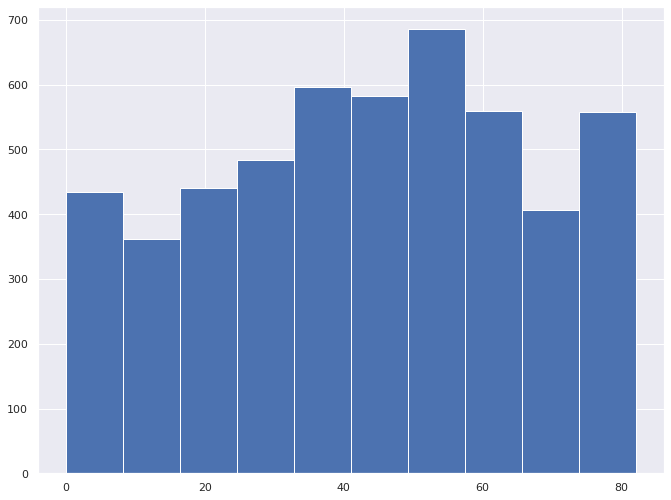

In [163]:
df_raw.age.hist()

In [162]:
def age_cohort(age):
    if   age >= 0 and age < 12:
        return "Children"
    elif age >= 12 and age < 21:
        return "Teens"
    elif age >= 21 and age < 45:
        return "Adults"
    elif age >= 45 and age < 65:
        return "Mid Adults"
    elif age >= 65 and age < 75:
        return "Elderly"
     elif age >= 75 :
        return "Elderly older adult"    

In [37]:
df_raw[(df_raw['age']<45)]['stroke'].value_counts()

0    2523
1      10
Name: stroke, dtype: int64

In [38]:
df_raw[(df_raw['age']>44) & (df_raw['age']<66)]['stroke'].value_counts()

0    1529
1      83
Name: stroke, dtype: int64

In [39]:
df_raw[(df_raw['age']>65) ]['stroke'].value_counts()

0    809
1    156
Name: stroke, dtype: int64

In [40]:
#df_filter_age35 = df_raw[df_raw['age']>35]
#df_filter_age35['stroke'].value_counts()

**We have read that most studies are carried out on populations > 35 years, so in the first instance we decided to remove those under 35 years of age but working the model we conclude that is better not remove them**


In [42]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64



Age is an important feature. Age feature distribution is not a normal distriubtion, which needs to be tranformed later. 
From catergorical features it can be seen that old age people are mostly having strokes, compared to younger ones.


**Studie of the missing values of BMI**



In [44]:
df_raw[df_raw['bmi'].isna()].shape

(201, 12)

Showing records where patient suffered from stroke but had missing value in bmi attribute.

In [45]:
df_raw[df_raw['bmi'].isna() & df_raw['stroke'] == 1].shape


(40, 12)

**We have 201 records were listed as NaN (not a number) in the BMI column. The first thought was to remove them since they represented a small fraction of the dataset. Nevertheless, by probing further, it contained 40 records where patients suffered a stroke. This information was valuable considering the fact that only 249 patients suffered a stroke in all  dataset.**


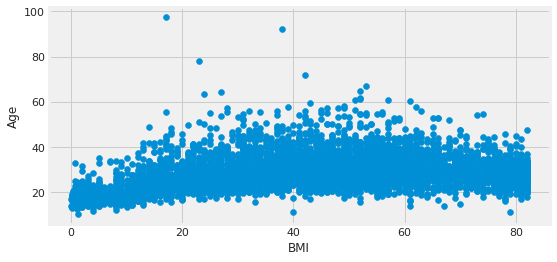

In [46]:
plt.figure(figsize = (8, 4))
plt.scatter(y=df_raw['bmi'], x=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

In [47]:
df_raw[df_raw['bmi']<19].shape

(404, 12)

In [48]:
df_raw[(df_raw['bmi']>= 19) & (df_raw['bmi']< 25)].shape

(1176, 12)

In [49]:
df_raw[(df_raw['bmi']>= 25) & (df_raw['bmi']< 30)].shape

(1409, 12)

In [50]:
df_raw[(df_raw['bmi']>= 30) & (df_raw['bmi']< 40)].shape

(1506, 12)

In [51]:
df_raw[df_raw['bmi']>= 40] .shape

(414, 12)

**Resume Preview of BMI dataset:**
-  201 missing value
-  404 observation whith underweight
- 1176 observation whith healthy weight
- 1409 observation whith overweight
- 1506 observation are obese
-  414 observation are extremely obese 

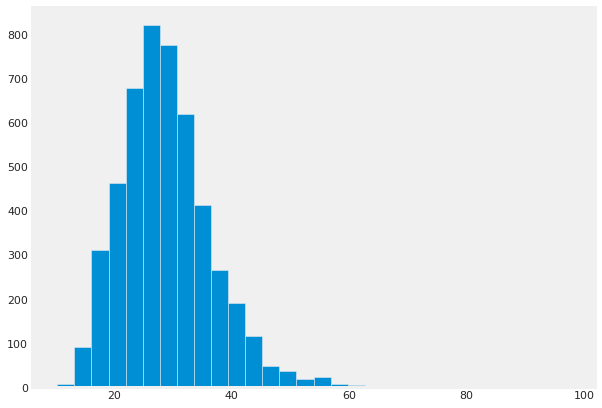

In [52]:
df_raw['bmi'].hist(bins=30,figsize=(8, 6),grid=False);
plt.show()

**The are same outliers of bmi**

**Studie of missing BMI**

Missing values ​​are present in most of the data sets we work with in our day to day. They are those in which no data value is stored in an observation. It is of vital importance to identify and deal with, for example, by imputation, these values ​​in order to continue with our analysis or training of the machine learning model.


Given the observations we have, we know that it is not feasible to output the observations with MBI null. That is why we must define what technique to use to complete those values.

1- The first technique consists of filling these values ​​with the mean (or median) of the data of the variable in the case that it is a numerical variable. For the case of categorical variables, we impute the missing values ​​with the mode of the variable.

2- Another more advanced technique consists of the use of predictive models to estimate missing values. A very popular non-parametric model for these cases is the k-nearest neighbors model, where the missing value is estimated as the mean (in the case of numerical variables) of the values ​​of the k closest neighbors or observations. Likewise, for categorical variables, the majority class of the closest k is used (KNN).
La librería scikit-learn nos proporciona la clase KNNImputer para hacer uso de este modelo en la imputación de missing values. Esta clase usa por defecto la distancia euclidiana, pero podemos elegir la que prefiramos modificando el parámetro metric. Asimismo, también podemos elegir el número de vecinos con el argumento n_neighbors y en esta ocasión usaremos 5. Podeís ver en el siguiente código como utilizamos este método para imputar los valores perdidos en la variable normalized-losses.

3-  Decision Tree to predict the missing BMI




We read that bmi is related to age. According to the graph found, we observe that the intervals are 5 years.
We define bins of 5 years starting at 35. 
We assign to the null values ​​of bmi the mean of the bins to which the observation corresponds.
Let show step by step.

In [53]:
def bmi_cohort(bmi):
    if   bmi >= 1 and bmi <= 18:
        return "underweight "
    elif bmi > 18 and bmi <= 24:
        return "healthy"
    elif bmi > 25 and bmi <= 29:
        return "overweight"
    elif bmi > 30 and bmi <= 39:
        return "obese"
    elif bmi > 40:
        return "extremely obese"

In [54]:
df_copy = df_raw.copy()
df_copy['bmi_group'] = df_copy['bmi'].apply(bmi_cohort)
df_copy.sort_values('bmi_group', inplace = True)

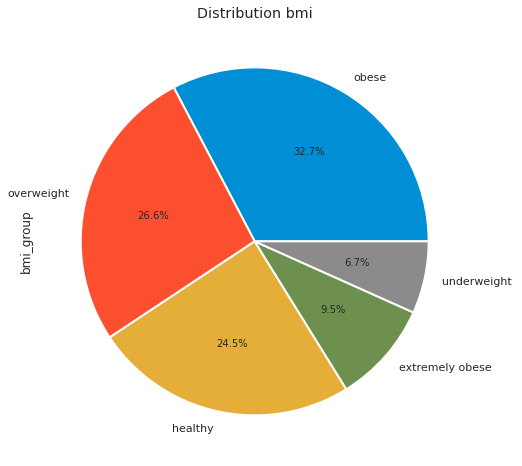

In [55]:
plt.figure(figsize=(12,8))
df_copy.bmi_group.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution bmi")
plt.show()

In [56]:
# Same labels as yours
labels = ['<34','35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +']

# Define the edges between bins
bins = [0,35, 45, 55, 65, np.inf]

# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
df_raw
 

id  gender    age  hypertension  heart_disease ever_married  \
0      9046    Male  67.00             0              1          Yes   
1     51676  Female  61.00             0              0          Yes   
2     31112    Male  80.00             0              1          Yes   
3     60182  Female  49.00             0              0          Yes   
4      1665  Female  79.00             1              0          Yes   
5     56669    Male  81.00             0              0          Yes   
6     53882    Male  74.00             1              1          Yes   
7     10434  Female  69.00             0              0           No   
8     27419  Female  59.00             0              0          Yes   
9     60491  Female  78.00             0              0          Yes   
10    12109  Female  81.00             1              0          Yes   
11    12095  Female  61.00             0              1          Yes   
12    12175  Female  54.00             0              0          Yes   
13     8213    Male  78.00             0              1          Yes   
14     5317  Female  79.00             0              1          Yes   
15    58202  Female  50.00             1              0          Yes   
16    56112    Male  64.00             0              1          Yes   
17    34120    Male  75.00             1              0          Yes   
18    27458  Female  60.00             0              0           No   
19    25226    Male  57.00             0              1           No   
20    70630  Female  71.00             0              0          Yes   
21    13861  Female  52.00             1              0          Yes   
22    68794  Female  79.00             0              0          Yes   
23    64778    Male  82.00             0              1          Yes   
24     4219    Male  71.00             0              0          Yes   
25    70822    Male  80.00             0              0          Yes   
26    38047  Female  65.00             0              0          Yes   
27    61843    Male  58.00             0              0          Yes   
28    54827    Male  69.00             0              1          Yes   
29    69160    Male  59.00             0              0          Yes   
30    43717    Male  57.00             1              0          Yes   
31    33879    Male  42.00             0              0          Yes   
32    39373  Female  82.00             1              0          Yes   
33    54401    Male  80.00             0              1          Yes   
34    14248    Male  48.00             0              0           No   
35      712  Female  82.00             1              1           No   
36    47269    Male  74.00             0              0          Yes   
37    24977  Female  72.00             1              0          Yes   
38    47306    Male  58.00             0              0           No   
39    62602  Female  49.00             0              0          Yes   
40     4651    Male  78.00             0              0          Yes   
41     1261    Male  54.00             0              0          Yes   
42    61960    Male  82.00             0              1          Yes   
43     1845  Female  63.00             0              0          Yes   
44     7937    Male  60.00             1              0          Yes   
45    19824    Male  76.00             1              0          Yes   
46    37937  Female  75.00             0              1           No   
47    47472  Female  58.00             0              0          Yes   
48    35626    Male  81.00             0              0          Yes   
49    36338  Female  39.00             1              0          Yes   
50    18587  Female  76.00             0              0           No   
51    15102    Male  78.00             1              0          Yes   
52    59190  Female  79.00             0              1          Yes   
53    47167  Female  77.00             1              0          Yes   
54     8752  Female  63.00             0         

In [57]:
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw[df_raw['bmi'].isna()].sample(10)

id  gender   age  hypertension  heart_disease ever_married  \
4750  16902  Female  70.0             0              1          Yes   
2477  24096  Female  34.0             1              0          Yes   
4255   3318  Female  18.0             0              0           No   
174   40899  Female  78.0             0              0          Yes   
2739   2538  Female   5.0             0              0           No   
1457  40253    Male  27.0             0              0           No   
70    70676  Female  76.0             0              0          Yes   
1669   1842    Male  58.0             0              0          Yes   
1866  25305    Male  10.0             0              0           No   
432   11999  Female  63.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level  bmi   smoking_status  \
4750  Self-employed          Urban             240.69  NaN           smokes   
2477  Self-employed          Urban             100.61  NaN          Unknown   
4255        Private          Rural             101.12  NaN           smokes   
174   Self-employed          Rural              60.67  NaN  formerly smoked   
2739       children          Rural             105.18  NaN          Unknown   
1457        Private          Rural             191.79  NaN           smokes   
70         Govt_job          Rural              62.57  NaN  formerly smoked   
1669        Private          Urban              94.00  NaN          Unknown   
1866       children          Rural              99.87  NaN  formerly smoked   
432        Govt_job          Rural              79.92  NaN           smokes   

      stroke   age_bins    bmi_new  
4750       0     65 - +  29.557083  
2477       0        <34  25.425751  
4255       0        <34  25.425751  
174        1     65 - +  29.557083  
2739       0        <34  25.425751  
1457       0        <34  25.425751  
70         1     65 - +  29.557083  
1669       0  55 - 64.9  31.343135  
1866       0        <34  25.425751  
432        0  55 - 64.9  31.343135

In [58]:
df_raw.sample(10)

id  gender    age  hypertension  heart_disease ever_married  \
2768   2885    Male  72.00             1              0          Yes   
3742  29546    Male  71.00             0              0          Yes   
485   67548  Female  31.00             0              0          Yes   
1812  12366  Female  35.00             0              0           No   
1740  62681  Female  38.00             1              0          Yes   
812   67412  Female  39.00             0              0          Yes   
4982    949    Male  20.00             0              0           No   
3295  29955    Male   0.08             0              0           No   
117    7547    Male  74.00             0              0          Yes   
810   23016    Male  55.00             0              0          Yes   

     work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
2768   Private          Rural             231.71   NaN          Unknown   
3742  Govt_job          Rural              99.76  33.4  formerly smoked   
485    Private          Urban              98.99  31.2     never smoked   
1812   Private          Urban              97.58  24.3          Unknown   
1740   Private          Urban             137.94  41.8     never smoked   
812    Private          Rural              83.83  30.3     never smoked   
4982   Private          Rural              75.90  32.2     never smoked   
3295  children          Rural              70.33  16.9          Unknown   
117    Private          Urban              72.96  31.3           smokes   
810    Private          Rural              86.60  26.5     never smoked   

      stroke   age_bins    bmi_new  
2768       0     65 - +  29.557083  
3742       0     65 - +  33.400000  
485        0        <34  31.200000  
1812       0  35 - 44.9  24.300000  
1740       0  35 - 44.9  41.800000  
812        0  35 - 44.9  30.300000  
4982       0        <34  32.200000  
3295       0        <34  16.900000  
117        1     65 - +  31.300000  
810        0  55 - 64.9  26.500000

In [59]:
df_raw[df_raw['bmi'].isna()].shape

(201, 14)

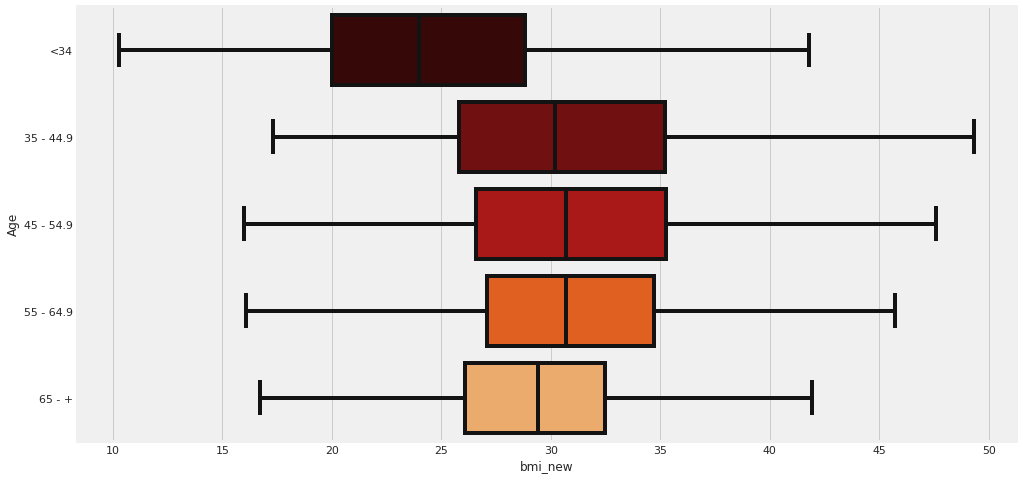

In [60]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi_new, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Age') 
plt.show()

With this graph we observe that the behavior of the age/bmi ranges is the same as the graph that we mentioned at the beginning of this task.

**Change bmi null by mean of all bmi value**

In [61]:
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)


In [62]:
df_raw[df_raw['bmi'].isna()].shape

(0, 14)

**Now we have all BMI whith values.**

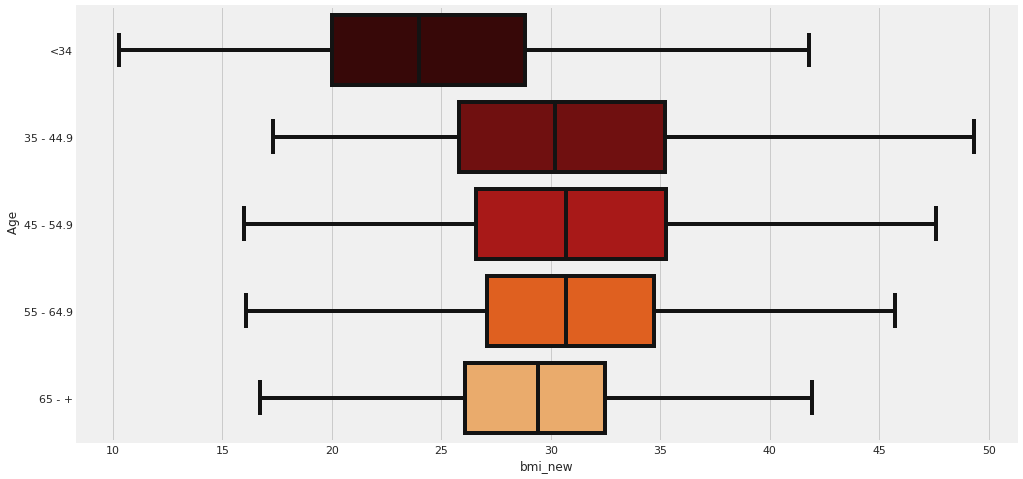

In [63]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi_new, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel(' Age') 
plt.show()

In [64]:
def bmi_cohort(bmi):
    if   bmi >= 0 and bmi <= 18:
        return "underweight "
    elif bmi > 18 and bmi <= 24:
        return "healthy"
    elif bmi > 25 and bmi <= 29:
        return "overweight"
    elif bmi > 30 and bmi <= 39:
        return "obese"
    elif bmi > 40:
        return "extremely obese"

In [65]:
df_copy = df_raw.copy()
df_copy['bmi_type'] = df_copy['bmi'].apply(bmi_cohort)
df_copy.sort_values('bmi_type', inplace = True)

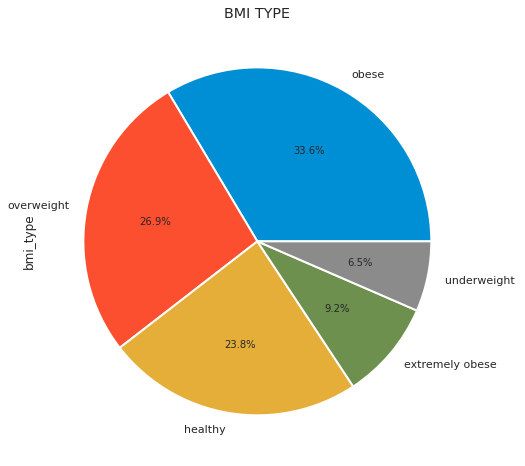

In [66]:
plt.figure(figsize=(12,8))
df_copy.bmi_type.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("BMI TYPE")
plt.show()

In [67]:
df_raw[df_raw['bmi']<19].shape

(404, 14)

In [68]:
df_raw[(df_raw['bmi']>= 19) & (df_raw['bmi']< 25)].shape

(1176, 14)

In [69]:
df_raw[(df_raw['bmi']>= 25) & (df_raw['bmi']< 30)].shape

(1530, 14)

In [70]:
df_raw[(df_raw['bmi']>= 30) & (df_raw['bmi']< 40)].shape

(1586, 14)

In [71]:
df_raw[df_raw['bmi']>= 40].shape

(414, 14)

**Resume BMI after filling missing data:**
-  404 underweight
- 1176 healthy 
- 1530 overweight
- 1586 obese
-  414 extremely obese 

In [72]:
df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)

**Transform if needed**

In this dataset, there are 3 numerical attributes, age, average glucose level and bmi. Let’s normalize them to ensure that they have equal weightage when building a classifier. Noted that new columns were created rather than replacing the initial columns. This preserved the original data.

In [73]:
df_raw.sample(10)

gender    age  hypertension  heart_disease ever_married      work_type  \
3932  Female  23.00             0              0           No        Private   
512     Male  31.00             0              0          Yes        Private   
2577  Female  77.00             0              0          Yes        Private   
3053  Female  29.00             0              0          Yes        Private   
1863  Female  12.00             0              0           No       children   
3348  Female  19.00             0              0           No        Private   
1975    Male   0.56             0              0           No       children   
4498  Female  62.00             0              0          Yes  Self-employed   
2394  Female  19.00             0              0           No        Private   
1826    Male  14.00             0              0           No        Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
3932          Rural             100.06  28.6   never smoked       0  
512           Urban              88.78  35.8         smokes       0  
2577          Urban              99.78  38.0   never smoked       0  
3053          Rural             102.07  31.8   never smoked       0  
1863          Rural              85.97  35.7        Unknown       0  
3348          Urban              79.25  23.6        Unknown       0  
1975          Rural             111.77  21.1        Unknown       0  
4498          Rural             128.61  24.8   never smoked       0  
2394          Urban              83.43  38.4        Unknown       0  
1826          Rural             103.44  20.1   never smoked       0

<AxesSubplot:>

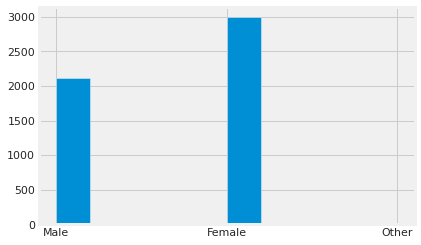

In [74]:
df_raw.gender.hist()

In [75]:
#set age as int
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'].astype(int)

# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status'].astype(int)



0       3
1       1
2       1
3       2
4       1
5       3
6       1
7       1
8       0
9       0
10      1
11      2
12      2
13      0
14      1
15      1
16      2
17      2
18      1
19      0
20      2
21      1
22      1
23      0
24      3
25      1
26      3
27      0
28      2
29      3
30      2
31      0
32      1
33      3
34      1
35      3
36      3
37      3
38      0
39      1
40      3
41      1
42      2
43      3
44      2
45      1
46      0
47      3
48      1
49      2
50      0
51      3
52      1
53      1
54      1
55      3
56      1
57      3
58      1
59      1
60      3
61      1
62      2
63      3
64      0
65      1
66      1
67      0
68      3
69      1
70      3
71      3
72      3
73      1
74      1
75      3
76      1
77      3
78      1
79      0
80      0
81      0
82      1
83      1
84      0
85      2
86      2
87      3
88      3
89      0
90      1
91      1
92      1
93      0
94      1
95      1
96      3
97      2
98      3
99      1


## Remove features are not significative for prediction 

In [76]:
#df_raw.drop(["ever_married","work_type","Residence_type","heart_disease"],axis=1,inplace=True)

In [77]:
df_raw.sample(10)

gender  age  hypertension  heart_disease ever_married      work_type  \
2227       1   65             0              0          Yes        Private   
2291       0   12             0              0           No       children   
4614       1   78             0              0          Yes       Govt_job   
2122       0   79             0              1          Yes  Self-employed   
3576       0   41             0              0          Yes        Private   
2446       1   80             0              0          Yes  Self-employed   
4053       1    0             0              0           No       children   
1817       0   43             0              0          Yes        Private   
1659       0   63             0              0          Yes        Private   
719        0   56             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
2227          Rural              71.06  26.4               1       0  
2291          Rural             196.91  19.7               0       0  
4614          Rural              61.38  24.3               0       0  
2122          Urban              88.83  40.3               2       0  
3576          Rural              83.97  28.5               3       0  
2446          Urban              64.15  40.5               1       0  
4053          Rural             118.75  17.4               0       0  
1817          Rural              62.99  27.0               3       0  
1659          Urban             199.14  28.5               1       0  
719           Urban             197.10  43.6               3       0

In [78]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 439.3+ KB


## Countplot for categorical variables

We ask ourselves some questions. These are all questions that can be explored and answered with some data visulization.

Does age makes one more likely to suffer a stroke? 

What about gender? 

BMI?


In [79]:
variables = [variable for variable in df_raw.columns if variable not in ['id','stroke']]
conts = ['age','avg_glucose_level','bmi']

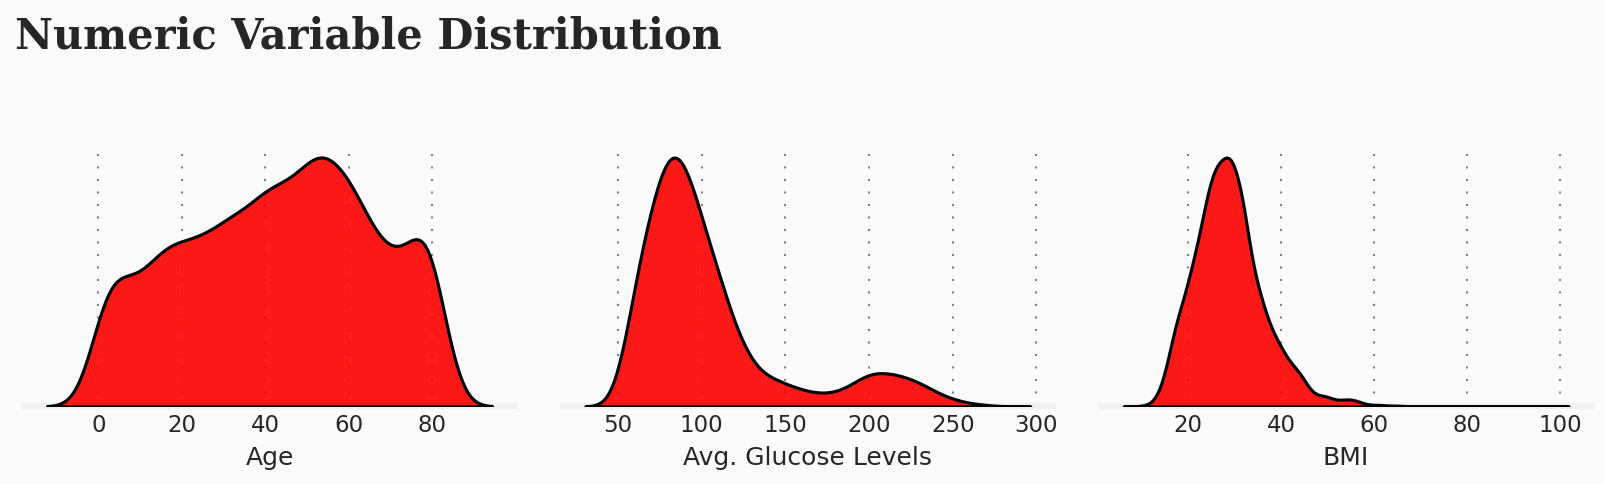

In [80]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df_raw[variable] ,ax=locals()["ax"+str(plot)], color='red', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.023, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')


plt.show()

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

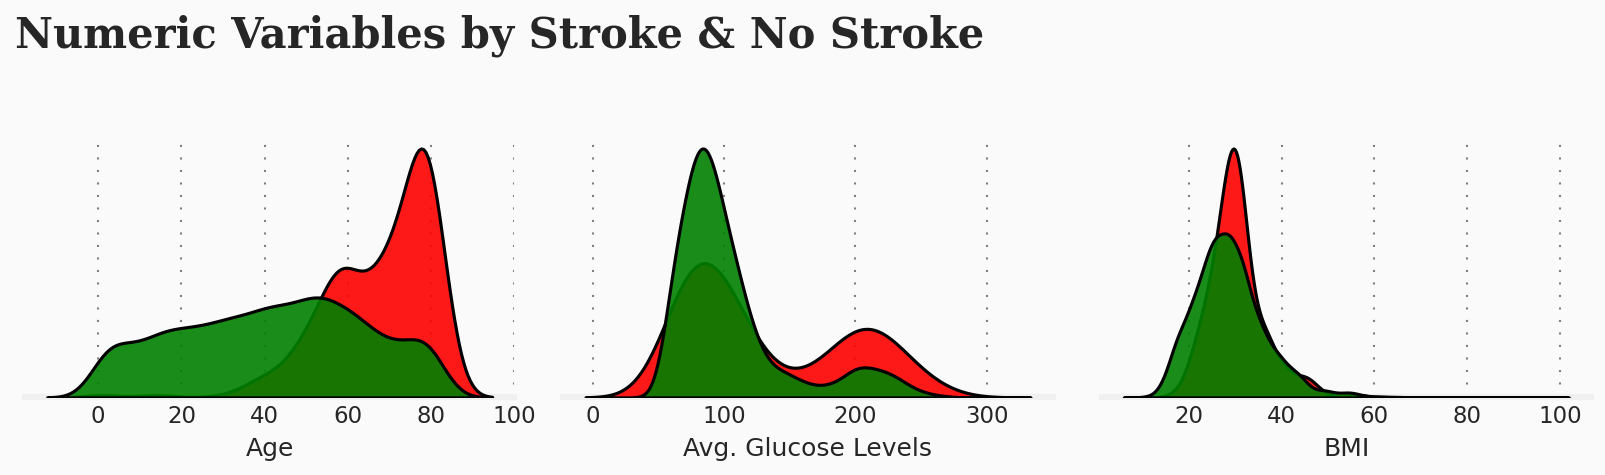

In [81]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df_raw[df_raw['stroke'] == 1]
ns = df_raw[df_raw['stroke'] == 0]
##0f4c81
##9bb7d4
for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='red', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='green', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
#ax3.set_xlabel('Gender')

        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

**Age looks to be a prominent factor** 

## Plotting different features against one other

In [82]:
#Let's check the categories in each of our object type features

def countplot_features(feature):
    plot=sns.countplot(x=feature,data=df_raw)
    plt.show()

def countplot_targetvsfeature(data, feature,y):
    fig = plt.figure(figsize=(20,5))
    plot=sns.countplot(x=feature,data=data,hue=y)
    plt.show()  

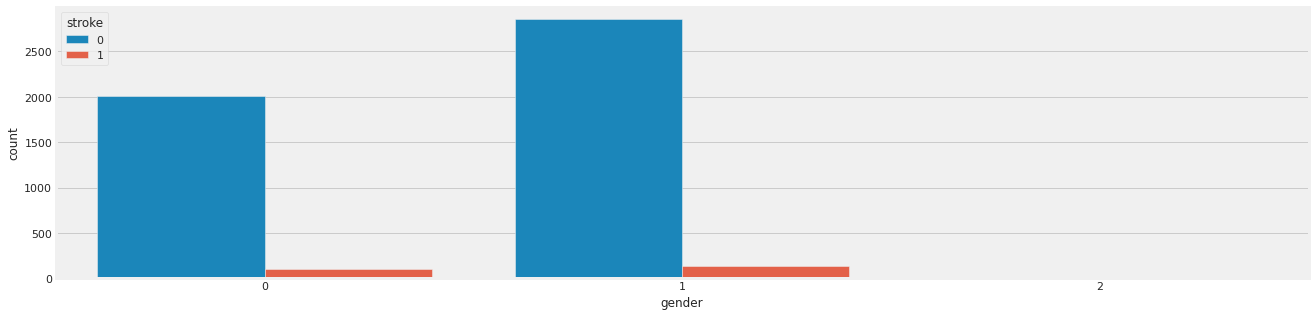

In [83]:
countplot_targetvsfeature(df_raw,'gender','stroke')

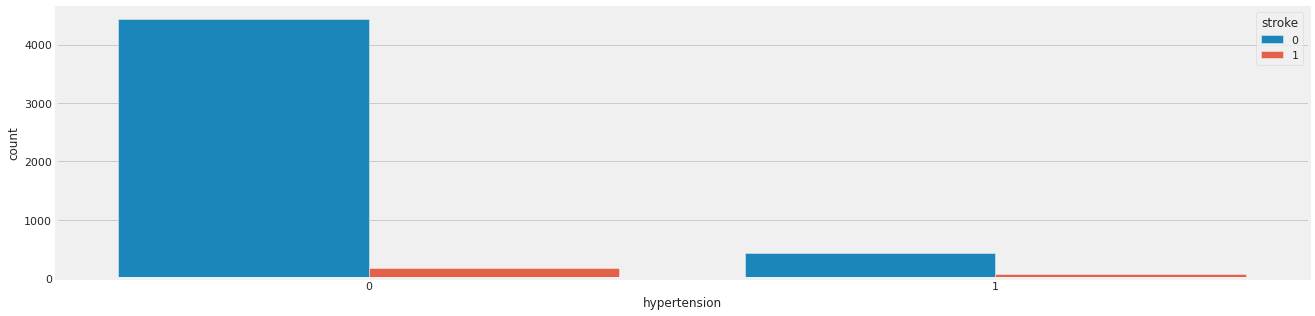

In [84]:
countplot_targetvsfeature(df_raw,'hypertension','stroke')


In [85]:
#countplot_targetvsfeature(df_raw,'smoking_status','stroke')


In [86]:

df_raw[(df_raw["stroke"]==1) & (df_raw["smoking_status"]=="Unknown")]



Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [87]:
#matrix = df_raw.corr(columns=["age","Avg. Glucose Levels","bmi"])
#display(matrix)

Correlation coefficient

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. 
The values range between -1.0 and 1.0. 

* A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. 
* A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. 
* A correlation of 0.0 shows no linear relationship between the movement of the two variables.


<AxesSubplot:>

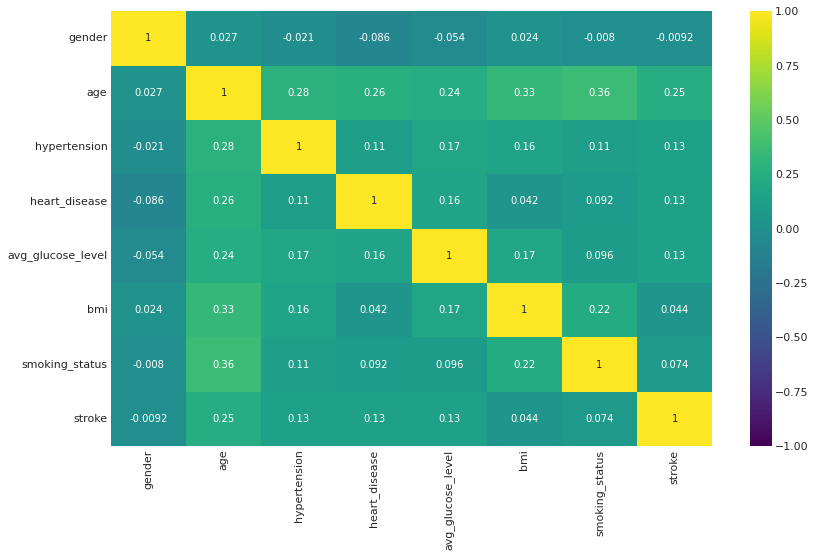

In [88]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

Some feature depend of or are relative to the age. weak relation


## Remove features are not significative for prediction 

In [89]:
df_raw.drop(["ever_married","work_type","Residence_type","heart_disease"],axis=1,inplace=True)

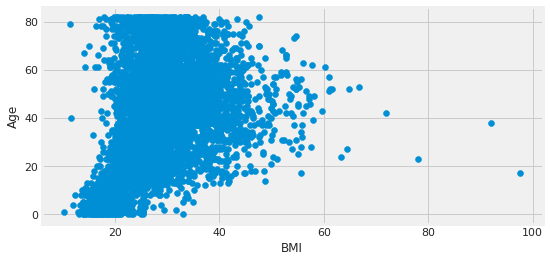

In [90]:
plt.figure(figsize = (8, 4))
plt.scatter(x=df_raw['bmi'], y=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

**The bmi increment and also incremente the age**

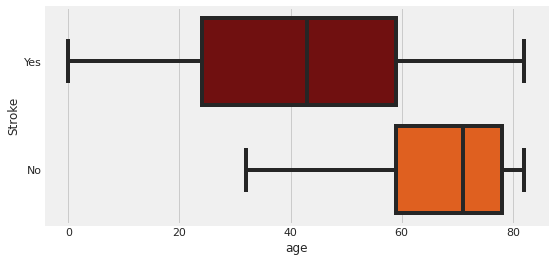

In [91]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['Yes','No'])
plt.show()

**OUTLIERS**

In [92]:
df_raw[df_raw['bmi']>60].sort_values(by=['bmi'])

gender  age  hypertension  avg_glucose_level   bmi  smoking_status  \
466        1   61             1             170.05  60.2               2   
270        1   57             1             129.54  60.9               2   
4838       1   51             0             107.72  60.9               0   
2840       1   52             0              98.27  61.2               0   
3825       1   52             0             118.46  61.6               2   
2764       1   24             0              85.55  63.3               1   
4188       1   27             0              57.96  64.4               1   
358        0   52             0              78.40  64.8               1   
1559       1   53             0              72.63  66.8               0   
544        0   42             0             210.48  71.9               1   
928        1   23             1              70.03  78.0               2   
4209       0   38             1              56.90  92.0               1   
2128       0   17             1              61.67  97.6               0   

      stroke  
466        0  
270        0  
4838       0  
2840       0  
3825       0  
2764       0  
4188       0  
358        0  
1559       0  
544        0  
928        0  
4209       0  
2128       0

## *will remove  92  and 97 bmi ?*


In [93]:
df_raw[df_raw['age']>80].sort_values(by=['bmi'])

gender  age  hypertension  avg_glucose_level        bmi  smoking_status  \
230        1   81             0              81.95  16.900000               1   
4511       1   82             0              82.63  17.900000               2   
1630       1   81             0             114.88  18.300000               3   
568        1   81             0              71.91  19.200000               0   
103        1   81             0              78.70  19.400000               0   
4094       0   82             0             111.81  19.800000               3   
5018       1   81             0              86.05  20.100000               3   
1350       1   82             1              62.46  20.300000               3   
1515       1   82             0              58.30  20.400000               1   
4149       1   81             1              59.11  20.700000               3   
670        0   82             0              56.75  21.000000               1   
1070       1   81             0             246.34  21.100000               1   
4716       1   82             0              96.98  21.500000               1   
214        1   81             0              95.84  21.500000               1   
32         1   82             1             196.92  22.200000               1   
1951       1   82             0              99.68  22.200000               0   
4408       0   81             0              92.96  22.200000               1   
3192       1   82             1              61.47  22.900000               1   
1303       1   81             0              63.65  23.000000               0   
4266       0   81             0             168.68  23.400000               3   
206        1   81             0              80.13  23.400000               1   
2418       1   82             0             229.58  23.700000               0   
4198       0   81             0              71.18  23.900000               3   
3462       0   82             0             214.51  24.000000               3   
3882       0   81             1             217.94  24.100000               3   
3603       0   82             0             101.57  24.300000               2   
2633       1   82             0             243.59  24.300000               1   
2314       0   82             0              89.83  24.700000               2   
1839       1   82             1              77.32  24.800000               0   
337        1   82             0             215.60  24.900000               1   
3502       0   81             0              68.27  25.000000               0   
2878       1   81             0              82.86  25.000000               1   
159        1   81             1              74.02  25.000000               1   
140        0   82             0             103.68  25.000000               1   
1938       0   81             0              83.52  25.000000               1   
3637       0   82             0             226.84  25.300000               3   
3643       0   81             0             234.35  25.300000               3   
3422       1   82             0              84.42  25.700000               0   
223        1   81             0              70.30  25.800000               2   
1042       1   82             0              82.21  26.000000               1   
179        0   81             0             213.22  26.100000               0   
2061       1   81             0              93.13  26.100000               0   
91         0   81             0              72.81  26.300000               1   
4724       1   81             1             174.54  26.400000               1   
42         0   82             0             144.90  26.400000               2   
35         1   82             1              84.03  26.500000               3   
1068       1   82             0              96.63  26.500000               0   
2715       0   81             0              89.02  26.900000               1   
2979       1   82             1      

# PIPELINE

#  ATENCION si da el tiempo probar llenar bmi con knn y comparar con los bins

In [94]:
############ YA LO HICIMOS ANTES DE TRANSFORMAR A CATEGORICAS

#def bmi_transformer_func (df):
#    df['age_bins'] = pd.cut(df['age'], bins=[35, 45, 55, 65, np.inf], labels=['35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'], right=False)
#    df['bmi'] =df.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
#    return df


In [95]:
#df_clean = bmi_transformer_func(df_raw)
#df_clean

In [96]:
#preprocessor = ColumnTransformer( 
#   transformers=[
#       # Transformer name, Transformer Object and columns      
#       ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] ),
#       ("id_drop", "drop", ['id','age_bins'])
#    ],
    # Any other columns are ignored
#    remainder="passthrough"

#)

In [97]:
#train_X = preprocessor.fit_transform(df_raw)
#df_raw=pd.DataFrame(train_X)
#df_raw

In [98]:
#pipe_clf = Pipeline([
#  (
#    "FeatureEngineering",
#    ColumnTransformer( 
#          transformers=[
#              # Transformer name, Transformer Object and columns
#              ("id_drop", "drop", ['id','age_bins']), 
#              ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] )
#            ],
#            # Any other columns are ignored
#            remainder="passthrough"
#
#        ),
#  )
#])
#pipe_clf.fit_transform(df_raw)

**Dejamos el siguiente solamente para correr más rápido cuando estamos probando los modelos, se saca antes de entregar**

In [99]:
""" df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')


#Impute BMI value
labels = ['0-34.9','35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'] 
# Define the edges between bins
bins = [0,35, 45, 55, 65, np.inf]
# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
#set bmi using the mean of each range of age
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)

#set age as int
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'].astype(int)


# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status'].astype(int)

#Remove features
df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)
df_raw.drop(["ever_married","work_type","Residence_type","heart_disease"],axis=1,inplace=True)"""

' df_raw = pd.read_csv(\'../data/raw/healthcare-dataset-stroke-data.csv\')\n\n\n#Impute BMI value\nlabels = [\'0-34.9\',\'35 - 44.9\', \'45 - 54.9\', \'55 - 64.9\', \'65 - +\'] \n# Define the edges between bins\nbins = [0,35, 45, 55, 65, np.inf]\n# pd.cut each column, with each bin closed on left and open on right\ndf_raw[\'age_bins\'] = pd.cut(df_raw[\'age\'], bins=bins, labels=labels, right=False)\n#set bmi using the mean of each range of age\ndf_raw[\'bmi_new\'] = df_raw.groupby("age_bins")[\'bmi\'].transform(lambda x: x.fillna(x.mean()))\ndf_raw[\'bmi\'].fillna(df_raw[\'bmi_new\'], inplace = True)\n\n#set age as int\ndf_raw[\'age\']=df_raw[\'age\'].astype(int)\n\n# Encoding the \'Sex\' column\ndf_raw[\'gender\'] = df_raw[\'gender\'].map({\'Male\': 0, \'Female\' : 1, \'Other\': 2})\ndf_raw[\'gender\'].astype(int)\n\n\n# Encoding the \'smoking status\' column\ndf_raw[\'smoking_status\'] = df_raw[\'smoking_status\'].map({\'Unknown\': 0, \'never smoked\' : 1, \'smokes\': 2 , \'formerly

**Scaler**

In [100]:
scaler = MinMaxScaler()
#scaler =  StandardScaler()
train_scaler = scaler.fit(df_raw[['age','bmi','avg_glucose_level']])
df_raw[['age','bmi','avg_glucose_level']] = train_scaler.transform(df_raw[['age','bmi','avg_glucose_level']])



# MODEL - REGRESSION - TESTS

In [101]:
df_guadar=df_raw.copy()

In [102]:
#we define our labels and features
y = df_raw['stroke']
X = df_raw.drop('stroke', axis=1)
#we divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13,stratify=y)

In [103]:
X_train

gender       age  hypertension  avg_glucose_level       bmi  \
4611       1  0.207317             0           0.105992  0.396334   
4209       0  0.463415             1           0.008217  0.935853   
2791       1  0.475610             0           0.065830  0.135166   
175        0  0.878049             1           0.601837  0.306987   
4204       1  0.378049             0           0.067399  0.334479   
4459       1  0.597561             1           0.202105  0.288660   
4639       0  0.597561             0           0.014172  0.221077   
2383       0  0.670732             0           0.820284  0.211913   
1710       0  0.548780             0           0.014449  0.156930   
4076       1  0.597561             0           0.078755  0.234822   
1140       1  0.817073             0           0.125519  0.126002   
2906       0  0.621951             0           0.241437  0.113402   
3679       0  0.536585             0           0.232527  0.242841   
138        0  0.926829             1           0.642831  0.191294   
4311       1  0.792683             0           0.695504  0.359679   
122        0  0.975610             0           0.944096  0.245132   
1131       1  0.573171             0           0.645924  0.403207   
1443       0  0.987805             0           0.027606  0.198167   
4263       0  0.987805             1           0.289216  0.192440   
1965       1  0.060976             0           0.250577  0.111111   
3590       1  0.841463             1           0.265765  0.265750   
4297       1  0.951220             0           0.099344  0.278351   
3727       1  0.658537             0           0.096621  0.363116   
4495       0  0.182927             0           0.180593  0.227950   
2313       0  0.219512             0           0.025113  0.260023   
544        0  0.512195             0           0.717201  0.705613   
437        1  0.024390             0           0.172468  0.088202   
4753       0  0.682927             0           0.391238  0.239404   
380        0  0.048780             0           0.235897  0.073310   
2024       1  0.390244             0           0.245176  0.115693   
4159       1  0.243902             0           0.116102  0.201604   
3839       0  0.548780             0           0.226203  0.313860   
3634       0  0.951220             0           0.021328  0.191294   
3998       1  0.329268             0           0.388145  0.296678   
3836       0  0.036585             0           0.231835  0.059565   
965        0  0.487805             0           0.153033  0.240933   
4724       1  0.987805             1           0.551288  0.184422   
3186       1  0.829268             0           0.739590  0.191294   
1656       0  0.646341             0           0.118595  0.328751   
4129       1  0.951220             0           0.710322  0.241695   
4959       1  0.609756             0           0.034669  0.150057   
1481       1  0.487805             0           0.256117  0.263459   
2107       1  0.634146             1           0.531345  0.193585   
2948       1  0.829268             0           0.139276  0.192440   
1016       1  0.621951             0           0.406380  0.394044   
1149       1  0.548780             0           0.112409  0.203895   
2374       0  0.707317             0           0.534623  0.233677   
807        1  0.621951             0           0.281691  0.121420   
87         1  0.853659             0           0.019527  0.252005   
1575       1  0.219512             0           0.521789  0.437572   
1504       0  0.512195             0           0.142877  0.194731   
3022       0  0.365854             0           0.120626  0.194731   
1706       1  0.500000             0           0.109916  0.235968   
1936       1  0.341463             0           0.094220  0.281787   
1739       1  0.195122             0           0.155710  0.192440   
2403       1  0.743902             0           0.068276  0.306987   
1743       0  0.451220             0           0.112824  0.170676   
2668

**We define function to display the results**

In [104]:
LABELS1={"No Stroke","Stroke"}
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS1, yticklabels=LABELS1, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y,zero_division=False))


## LOGISTIC REGRESSION


Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.





In [105]:
#we create a function that creates the model that we will use each time
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

#we run the model "as is"
model_logisticR = run_model(X_train, X_test, y_train, y_test)
 

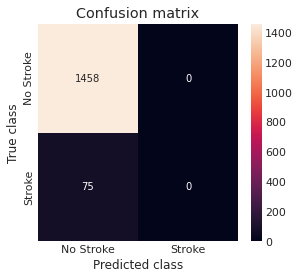

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



In [106]:
pred_y = model_logisticR.predict(X_test)
mostrar_resultados(y_test, pred_y)


* All are classified as non-stroke

## LOGISTIC REGRESSION BALANCED

In [107]:
def run_model_balanced(X_train, X_test, y_train, y_test, weight={1:18,0:1}):
    clf = LogisticRegression(C=0.1,penalty='l2',random_state=1,solver="newton-cg",class_weight=weight)
    clf.fit(X_train, y_train)
    return clf
 
model_balanced = run_model_balanced(X_train, X_test, y_train, y_test) 



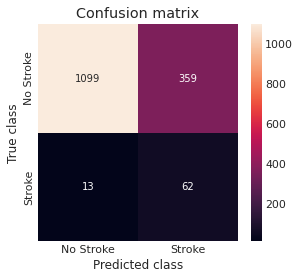

              precision    recall  f1-score   support

           0       0.99      0.75      0.86      1458
           1       0.15      0.83      0.25        75

    accuracy                           0.76      1533
   macro avg       0.57      0.79      0.55      1533
weighted avg       0.95      0.76      0.83      1533



In [108]:
pred_y = model_balanced.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [109]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

# Plots the ROC curve using the sklearn methods - Good plot
y_proba = model_balanced.predict_proba(X_test)
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)



NameError: name 'roc_curve' is not defined

## NEARMISS

Distribution before resampling Counter({0: 3403, 1: 174})
Distribution after resampling Counter({0: 174, 1: 174})


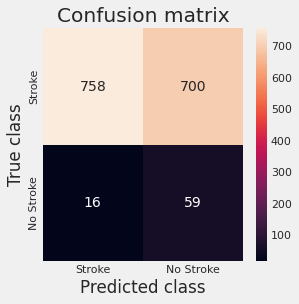

              precision    recall  f1-score   support

           0       0.98      0.52      0.68      1458
           1       0.08      0.79      0.14        75

    accuracy                           0.53      1533
   macro avg       0.53      0.65      0.41      1533
weighted avg       0.94      0.53      0.65      1533



In [ ]:
us = NearMiss(n_neighbors=50, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y) 


## SAMPLING

Distribution before resampling Counter({0: 1803, 1: 174})
Distribution labels after resampling Counter({0: 1803, 1: 1803})
Distribution labels finals Counter({0: 3403, 1: 1803})


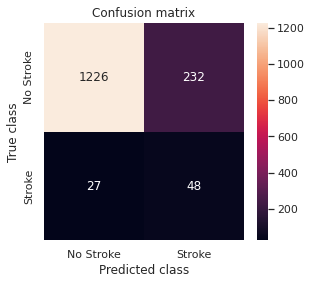

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1458
           1       0.17      0.64      0.27        75

    accuracy                           0.83      1533
   macro avg       0.57      0.74      0.59      1533
weighted avg       0.94      0.83      0.87      1533



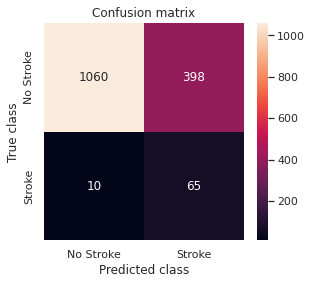

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1458
           1       0.14      0.87      0.24        75

    accuracy                           0.73      1533
   macro avg       0.57      0.80      0.54      1533
weighted avg       0.95      0.73      0.81      1533



In [ ]:
y_train_nostroke=y_train[y_train==0].sample(1600)
list(y_train_nostroke.index)
X_train_nostroke=X_train[X_train.index.isin(list(y_train_nostroke.index))]
len(X_train_nostroke)
X_train_muestra=X_train[~ X_train.index.isin(list(y_train_nostroke.index))]
y_train_muestra= y_train[~ y_train.index.isin(list(y_train_nostroke.index))]
y_train_muestra.value_counts()

from imblearn.over_sampling import RandomOverSampler


os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train_muestra, y_train_muestra)

print ("Distribution before resampling {}".format(Counter(y_train_muestra)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

y_train_final=pd.concat([y_train_nostroke, y_train_res ], ignore_index=True)
X_train_final=pd.concat([X_train_nostroke, X_train_res ], ignore_index=True)

print ("Distribution labels finals {}".format(Counter(y_train_final)))

model = run_model(X_train_final, X_test, y_train_final, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)



model_reg = run_model_balanced(X_train_final, X_test, y_train_final, y_test,weight={0:1,1:2}) 
pred_y = model_reg.predict(X_test)
mostrar_resultados(y_test, pred_y)


Distribution before resampling Counter({0: 3403, 1: 174})
Distribution labels after resampling Counter({0: 3403, 1: 3403})


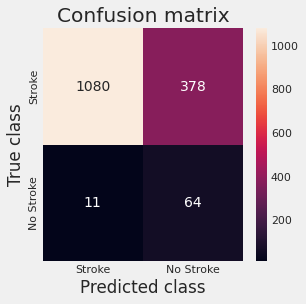

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1458
           1       0.14      0.85      0.25        75

    accuracy                           0.75      1533
   macro avg       0.57      0.80      0.55      1533
weighted avg       0.95      0.75      0.82      1533



In [ ]:
from imblearn.over_sampling import RandomOverSampler


os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)
  

## BALANCED BAGGING WITH DESICION TREE

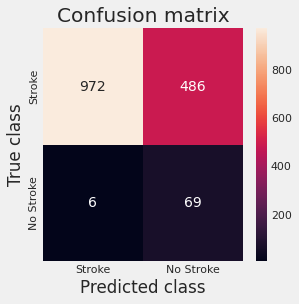

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1458
           1       0.12      0.92      0.22        75

    accuracy                           0.68      1533
   macro avg       0.56      0.79      0.51      1533
weighted avg       0.95      0.68      0.77      1533



In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(random_state=42,base_estimator=DecisionTreeClassifier(random_state=1,max_features=11,max_depth=11,class_weight={1:18,0:1}), n_estimators=2000)
bbc.fit(X_train,y_train) 

pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

## DECISION TREE CLASSIFIER BASIC

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9106327462491846

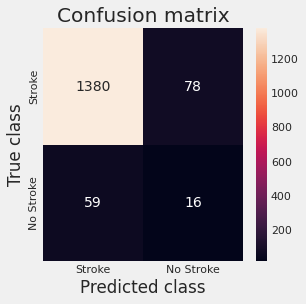

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1458
           1       0.17      0.21      0.19        75

    accuracy                           0.91      1533
   macro avg       0.56      0.58      0.57      1533
weighted avg       0.92      0.91      0.92      1533



In [ ]:
mostrar_resultados(y_test, y_pred)


## DESICION TREE CLASSIFIER BALANCED

In [ ]:
# Create the tree
tree_balance = DecisionTreeClassifier(max_depth=8, class_weight={1:18,0:1})   #
tree_balance.fit(X_train,y_train) 

#create array of probabilities
y_test_predict_proba = tree_balance.predict_proba(X_test)
y_test_predict_proba

y_pred = tree_balance.predict(X_test)
accuracy_score(y_test, y_pred)

tree_balance.get_params()

{'ccp_alpha': 0.0,
 'class_weight': {1: 18, 0: 1},
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**tree.feature_importances_ is a vector with the estimated importance of each attribute**

In [ ]:
for name, importance in zip(df_raw.columns[1:], tree_balance.feature_importances_):
    print(name + ': ' + str(importance))

age: 0.005825336923274534
hypertension: 0.5808139450694826
avg_glucose_level: 0.01204723202727693
bmi: 0.21044348262611917
smoking_status: 0.15564222402218789
stroke: 0.03522777933165886


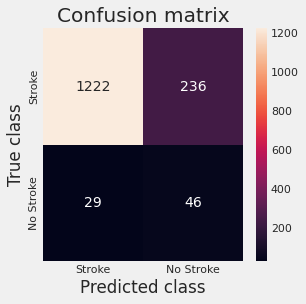

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1458
           1       0.16      0.61      0.26        75

    accuracy                           0.83      1533
   macro avg       0.57      0.73      0.58      1533
weighted avg       0.94      0.83      0.87      1533



In [ ]:
mostrar_resultados(y_test, y_pred)


## RANDOMFOREST CLASSIFIER

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.(Random Forest by Abhishek Sharma)

In [ ]:
# Fit a Random Forest model

clf = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight={1:12,0:1})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9497716894977168

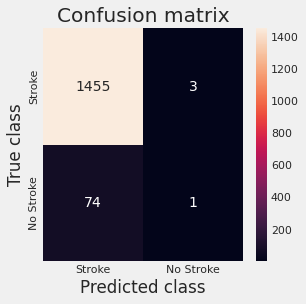

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.25      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



In [ ]:
mostrar_resultados(y_test, y_pred)

## GRADIENT BOOSTING

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is to establish target outcomes for this upcoming model to minimize errors.

Gradient Boosting trains many models in a gradual, additive and sequential manner. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.(Boosting Algorithm by Rui Guo et al.)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9458577951728636

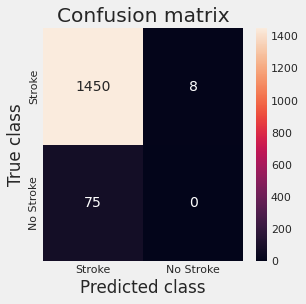

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



In [ ]:
mostrar_resultados(y_test, y_pred)


## Using GridSearchCV

In [ ]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [4,8,10,20,30]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[5,20,30,40],
                      min_samples_leaf=[5,10,20,40])

In [ ]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=41,class_weight={1:15,0:1}), parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 15},
                                              random_state=41),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10, 20, 30],
                         'max_features': range(1, 7),
                         'min_samples_leaf': [5, 10, 20, 40],
                         'min_samples_split': [5, 20, 30, 40]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

Best Criterion: gini
Best max_depth: 20
Best min_samples_split: 5
Best min_samples_leaf: 5
Best Number Of Components: 1


{'ccp_alpha': 0.0,
 'class_weight': {1: 15, 0: 1},
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 1,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 41,
 'splitter': 'best'}

In [ ]:
#Improve model of tree
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_features=7,                                             
                                    min_samples_split=5,
                                    min_samples_leaf=5,
                                    max_depth = 20,
                                    random_state=0,
                                    class_weight={1:18,0:1})
tree_model.fit(X_train, y_train)
print(f'Score:{tree_model.score(X_test, y_test)}')

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_model.feature_importances_):
    print(name + ': ' + str(importance))



Score:0.8460534898891063
age: 0.02795973032267054
hypertension: 0.44311233026574603
avg_glucose_level: 0.014605080786855618
bmi: 0.30828243739344324
smoking_status: 0.15895854953853242
stroke: 0.04708187169275211


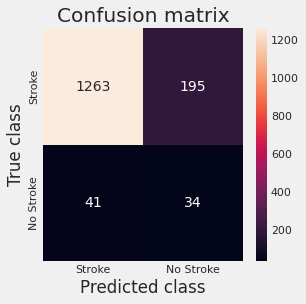

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1458
           1       0.15      0.45      0.22        75

    accuracy                           0.85      1533
   macro avg       0.56      0.66      0.57      1533
weighted avg       0.93      0.85      0.88      1533



In [ ]:
y_pred = tree_model.predict(X_test)
mostrar_resultados(y_test, y_pred)


## Using Grid to find the best Weight

In [ ]:
# define weight hyperparameter
w = [ {1:18,0:1} ] 
hyperparam_grid = {"class_weight": w , 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
# define model
lg5 = LogisticRegression(random_state=13,solver='newton-cg', max_iter=500)
# define evaluation procedure
grid = GridSearchCV(lg5,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8386932773109244 with param: {'C': 100, 'class_weight': {1: 18, 0: 1}}


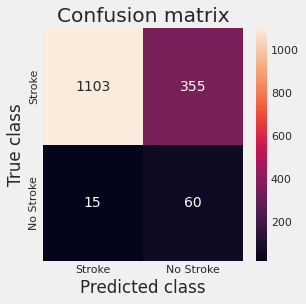

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1458
           1       0.14      0.80      0.24        75

    accuracy                           0.76      1533
   macro avg       0.57      0.78      0.55      1533
weighted avg       0.95      0.76      0.83      1533



In [ ]:
lg6 = LogisticRegression(C= 0.01, random_state=13,solver='newton-cg', max_iter=500,class_weight={0: 1, 1: 18})
lg6.fit(X_train,y_train)
y_pred = lg6.predict(X_test)
mostrar_resultados(y_test, y_pred)

## K-Nearest Neighbour (KNN)

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems.

It's called a lazy learning algorithm or lazy learner because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining..

In [ ]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

NameError: name 'x_train' is not defined

In [ ]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

## Support Vector Machine (SVM)

Support Vector Machine (SVM) is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [ ]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [ ]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

## Gaussian Naive Bayes

Naive Bayes Classifiers are based on the Bayes Theorem, which one assumption taken is the strong independence assumptions between the features. These classifiers assume that the value of a particular feature is independent of the value of any other feature. In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayes classifiers need a small training data to estimate the parameters needed for classification. Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.

In [ ]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

In [ ]:
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')


In [ ]:
"""# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting'
                                  ], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})"""